In [2]:
import geopandas as gpd
import random
import numpy as  np
from pykrige.uk import UniversalKriging
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#Making some test-data to work with for now
import geopandas as gpd
import random
import numpy as  np

#The data would end up looking something like this:
gdf = gpd.GeoDataFrame(columns = ["lat","lon", "pH", "TDS"],)


#generate some random points
gdf["lat"] = [random.random()*2.0 for _ in range(100)]
gdf["lon"] = [random.random()*2.0 for _ in range(100)]
gdf["geometry"] = gpd.points_from_xy(gdf.lon, gdf.lat)

#arbitrary value generation for pH and TDS
def ph(x, y):
    return np.sin(x**2 + y**2) / (x**2 + y**2)
def TDS(x, y):
    return np.sin(x**2 + y/2) / (x/2 + y/20)

gdf["pH"] = ph(gdf["lat"],gdf["lon"])

gdf["TDS"] = TDS(gdf["lat"],gdf["lat"])


Text(0.5, 0.98, 'pH and TDS test')

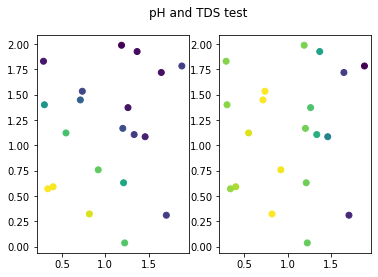

In [4]:
#Testplot of values
import matplotlib.pyplot as plt
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.scatter(x=gdf["lat"], y = gdf["lon"], c=gdf["pH"])
ax2.scatter(x=gdf["lat"], y = gdf["lon"], c=gdf["TDS"])
fig.suptitle("pH and TDS test")

In [14]:
### The hard working backend 
import scripts.interpol

ph_z, ph_SS = scripts.interpol.interkrige(gdf["lon"], gdf["lat"], gdf["pH"])
tds_z, tds_SS = scripts.interpol.interkrige(gdf["lon"], gdf["lat"], gdf["TDS"])


In [84]:
import rasterio
from rasterio.transform import Affine

x = np.linspace(min(gdf.lon),max(gdf.lon), len(gdf.lon))
res = (x[-1] - x[0]) / len(x)

transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

new_dataset = rasterio.open(
    "./data/test.tif",
    "w",
    driver = "GTiff",
    height = ph_z.shape[0],
    width = ph_z.shape[1],
    count = 1,
    dtype =  ph_z.dtype,
    crs='+proj=latlong',
    transform=transform
)

new_dataset.write(ph_z,1)
new_dataset.close()

<AxesSubplot:>

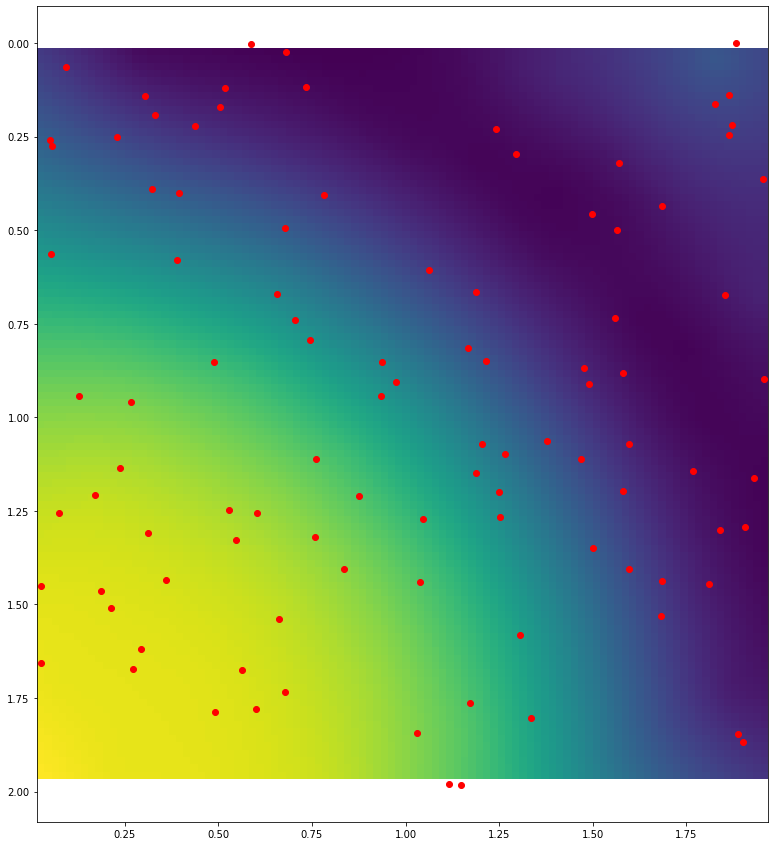

In [105]:
import geopandas
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

r = rasterio.open("./data/test.tif")

fig, ax = plt.subplots(figsize=(15, 15))

rasterio.plot.show(r,ax=ax)
gdf.plot(ax=ax,facecolor="red")

<AxesSubplot:>

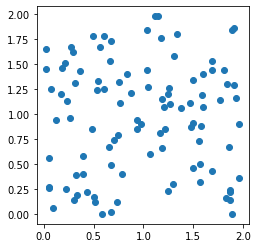

In [102]:
gdf.plot()

Text(0.5, 0.98, 'pH and TDS interpolation results')

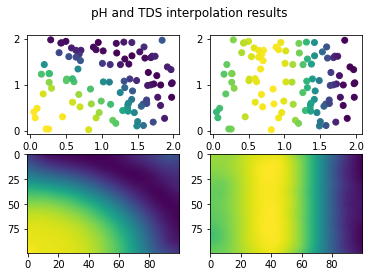

In [87]:
#Compare results
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x=gdf["lat"], y = gdf["lon"], c=gdf["pH"])
axs[0,1].scatter(x=gdf["lat"], y = gdf["lon"], c=gdf["TDS"])
axs[1,0].imshow(ph_z,aspect = "auto")
axs[1,1].imshow(tds_z,aspect = "auto")

fig.suptitle("pH and TDS interpolation results")